<a href="https://colab.research.google.com/github/johnchristiancoronacion/IS102-Basic-Machine-Learning/blob/main/MP1_Iris_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Problem No.1 — Fundamentals of Machine Learning
**Name:** John Christian B. Coronacion  
**Section:** 3B (replace with your section)  
**Dataset:** Iris (classification)  
**Model:** Logistic Regression  
**Date:** (put your submission date)

In [11]:
!pip install -q scikit-learn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [3]:
iris = load_iris()
X = iris.data
y = iris.target

df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y
df['target_name'] = [iris.target_names[i] for i in y]

print("Feature names:", iris.feature_names)
print("Target names:", iris.target_names)
display(df.head())
display(df.describe())
print("\nClass distribution:")
print(df['target_name'].value_counts())

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000



Class distribution:
target_name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


In [5]:
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape :", X_test.shape)

Train shape: (120, 4)
Test shape : (30, 4)


In [9]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Accuracy: 0.9667
Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



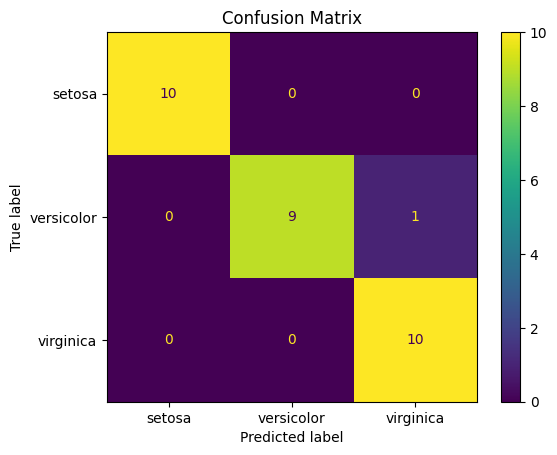

In [10]:
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=iris.target_names)
plt.title("Confusion Matrix")
plt.show()

**Reflection:**

I used supervised learning (classification) with Logistic Regression on the Iris dataset. The main challenge that could affect the model is *overfitting* if the dataset were more complex or if we tuned too many parameters. Missing or incorrect values would reduce model reliability and could require cleaning or imputation. This simple baseline is useful as a first step; real-world problems often need more robust data cleaning and cross-validation.